In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import math

In [2]:
data = pd.read_excel('Kiaomi.xlsx')

In [3]:
data.head()

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668.0
1,2,Saturday,Chrome,15,5,16.9,3469.0
2,3,Monday,Internet Explorer,20,6,7.3,5215.0
3,4,Monday,Chrome,42,6,30.1,10423.0
4,5,Saturday,Internet Explorer,20,6,13.3,5404.0


In [4]:
data.shape

(43200, 7)

In [5]:
#performimg Descriptivs statistics

data.describe()

,Customer,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,21600.500000,23.740000,4.820000,12.810000,6812.820000
std,12470.910151,8.267647,2.016853,6.002444,3201.905731
min,1.000000,8.000000,2.000000,4.300000,1784.000000
25%,10800.750000,18.000000,3.000000,8.500000,4473.000000
50%,21600.500000,22.500000,4.500000,11.400000,6215.000000
75%,32400.250000,29.000000,6.000000,15.100000,8412.000000
max,43200.000000,46.000000,10.000000,32.900000,15851.000000


In [6]:
data.skew()

Customer              0.000000
No. of Clicks         0.677900
Pages Viewed          0.626857
Time (min)            1.406018
Amount Spent (Rs.)    1.017343
dtype: float64

In [7]:
data.kurt()

Customer             -1.200000
No. of Clicks         0.025564
Pages Viewed          0.034871
Time (min)            2.053011
Amount Spent (Rs.)    0.673882
dtype: float64

In [8]:
data.corr()

,Customer,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
Customer,1.000000,0.002474,0.000821,-0.001407,0.002682
No. of Clicks,0.002474,1.000000,0.566934,0.516365,0.903248
Pages Viewed,0.000821,0.566934,1.000000,0.595568,0.723667
Time (min),-0.001407,0.516365,0.595568,1.000000,0.580048
Amount Spent (Rs.),0.002682,0.903248,0.723667,0.580048,1.000000


Text(0, 0.5, 'Density')

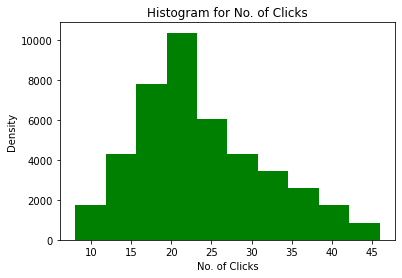

In [9]:
#creating visuals

# plotting Histogram for no. of clicks using matplotlib



plt.hist(data['No. of Clicks'],color='green')

plt.title('Histogram for No. of Clicks')
plt.xlabel('No. of Clicks')
plt.ylabel('Density')

D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

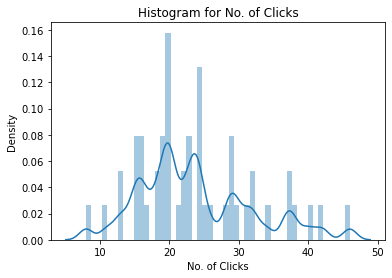

In [10]:
#plotting histogram for no. of clicks using seaborn

sns.distplot(data['No. of Clicks'])
plt.title('Histogram for No. of Clicks')
plt.xlabel('No. of Clicks')
plt.ylabel('Density')

{'whiskers': [<matplotlib.lines.Line2D at 0x19c20134820>,
 'caps': [<matplotlib.lines.Line2D at 0x19c20134ee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19c20134490>],
 'medians': [<matplotlib.lines.Line2D at 0x19c201465e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19c20146940>],
 'means': []}

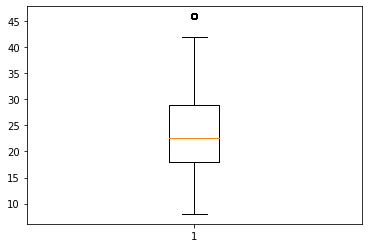

In [11]:
#plotting a Box Plot using Matplotlib for No. of Clicks

plt.boxplot(data['No. of Clicks'])

D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No. of Clicks'>

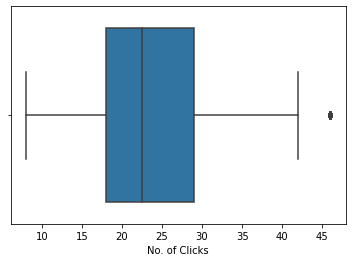

In [12]:
sns.boxplot(data['No. of Clicks'])

Text(0, 0.5, 'Amount')

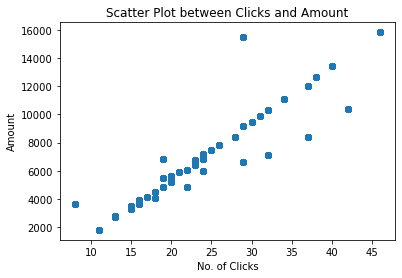

In [13]:
#plotting a scatter graph using matplotlib

plt.scatter(data['No. of Clicks'],data['Amount Spent (Rs.)'])
plt.title('Scatter Plot between Clicks and Amount')
plt.xlabel('No. of Clicks')
plt.ylabel('Amount')

D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scatter plot for No. of Clicks')

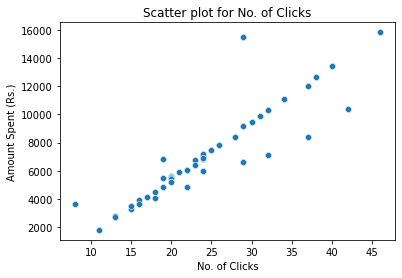

In [14]:
sns.scatterplot(data['No. of Clicks'],data['Amount Spent (Rs.)'])
plt.title('Scatter plot for No. of Clicks')


D:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No. of Clicks', ylabel='Amount Spent (Rs.)'>

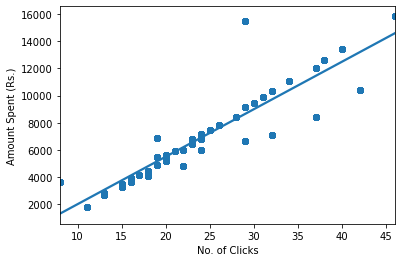

In [15]:
sns.regplot(data['No. of Clicks'],data['Amount Spent (Rs.)'])

In [16]:
#correlation Study

corr=data.corr()

<AxesSubplot:>

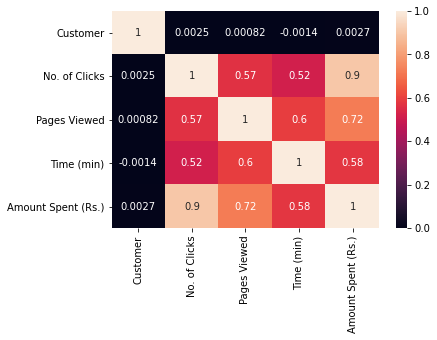

In [17]:
#visualizing correlation Matrix

sns.heatmap(corr,annot=True)


# Steps for building Predictive Modelling:

## 1. Import the relevant the model building library.
## 2. Separate X, Y and store it in new variable.
## 3. Store Linear Regression Function in a small variable.
## 4. Build/ Fit the model using X and Y.
## 5. Predict the model for new predicted Y using X variables.
## 6. Evaluate the model (R-square and RMSE)


In [18]:
#creating X and Y variables

x=data['No. of Clicks']
x.head()

0    13
1    15
2    20
3    42
4    20
Name: No. of Clicks, dtype: int64

In [19]:
#converting list (x) variable into DataFrame

x=pd.DataFrame(x)
x.head()

,No. of Clicks
0,13
1,15
2,20
3,42
4,20


In [20]:
y=data['Amount Spent (Rs.)']
y=pd.DataFrame(y)
y.head()

,Amount Spent (Rs.)
0,2668.0
1,3469.0
2,5215.0
3,10423.0
4,5404.0


In [21]:
#storing linear regession function in a small variable

lr=LinearRegression()

In [22]:
#building a Model

lr.fit(x,y)

LinearRegression()

In [23]:
#predicting new Y variable

new_y=lr.predict(x)

In [24]:
#Evaluating the model
print('R Square for the model is:',r2_score(y,new_y))

R Square for the model is: 0.8158570887617314


In [25]:
MSE=mean_squared_error(y,new_y)

In [26]:
RMSE=math.sqrt(MSE)

In [27]:
avg_y=y.mean()

In [28]:
RMSE_percent=RMSE/avg_y

In [29]:
RMSE_percent

Amount Spent (Rs.)    0.201676
dtype: float64

Text(0, 0.5, 'Density')

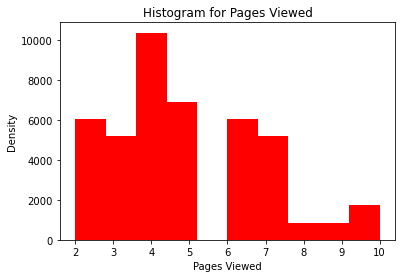

In [30]:
plt.hist(data['Pages Viewed'],color='red')
plt.title('Histogram for Pages Viewed')
plt.xlabel('Pages Viewed')
plt.ylabel('Density')

D:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: module 'seaborn' has no attribute 'title'

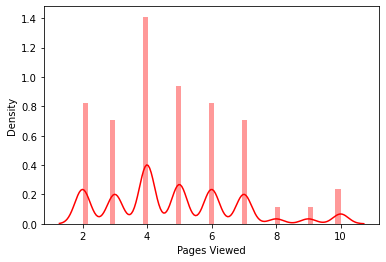

In [31]:
sns.distplot(data['Pages Viewed'],color='red')
sns.title('Histogram for Pages Viewed')


In [ ]:
plt.boxplot(data['Pages Viewed'])

In [ ]:
sns.boxplot(data['Pages Viewed'])

In [ ]:
plt.scatter(data['Pages Viewed'],data['Amount Spent (Rs.)'])
plt.title('Scatter Plot between Pages Viewed and Amount')
plt.xlabel('Pages Viewed')
plt.ylabel('Amount')

In [ ]:
sns.scatterplot(data['Pages Viewed'],data['Amount Spent (Rs.)'])
sns.title('Scatter Plot between Pages Viewed and Amount')

In [ ]:
sns.regplot(data['Pages Viewed'],data['Amount Spent (Rs.)'])

In [39]:
x=data.iloc[:,4:6]
x.head()

,Pages Viewed,Time (min)
0,4,8.5
1,5,16.9
2,6,7.3
3,6,30.1
4,6,13.3


In [41]:
y=data['Amount Spent (Rs.)']
y=pd.DataFrame(y)
y.head()

,Amount Spent (Rs.)
0,2668.0
1,3469.0
2,5215.0
3,10423.0
4,5404.0


In [42]:
lr=LinearRegression()

In [43]:
lr.fit(x,y)

LinearRegression()

In [44]:
new_y=lr.predict(x)

In [45]:
print('R Square for the model is:',r2_score(y,new_y))

R Square for the model is: 0.5581234544599036


In [46]:
MSE=mean_squared_error(y,new_y)

In [47]:
RMSE=math.sqrt(MSE)

In [48]:
avg_y=y.mean()

In [49]:
RMSE_percent=RMSE/avg_y

In [50]:
RMSE_percent

Amount Spent (Rs.)    0.312412
dtype: float64